# KNN 분류

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
# 훈련세트, 테스트세트 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# stratify=fish_target : target 데이터가 골고루 섞이도록 훈련, 테스트 세트를 분리한다.
# 분류 문제에서는 일반적으로 사용하는 것이 좋다. 


In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))  # 빙어로 예측

[0.]


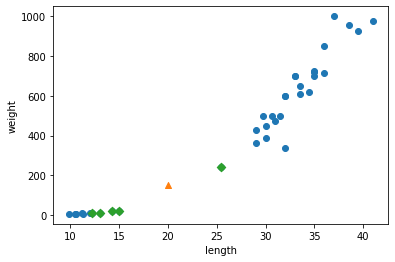

In [ ]:
distances,indexs = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20, 150, marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 가장 가까운 5개의 샘플 체크

## 스케일 맞추기

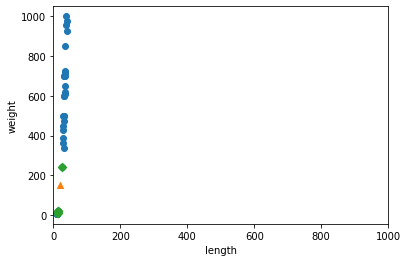

In [ ]:
distances,indexs = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20, 150, marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 표준점수로 변경

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std

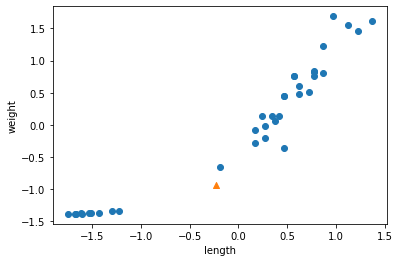

In [ ]:
new = ([25, 150] - mean) /  std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new])) # 도미로 예측

[1.]


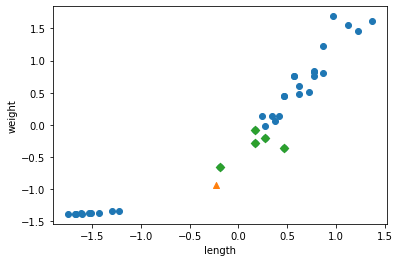

In [ ]:
distances,indexs = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# KNN 회귀

* 농어의 길이로 무게를 예측

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

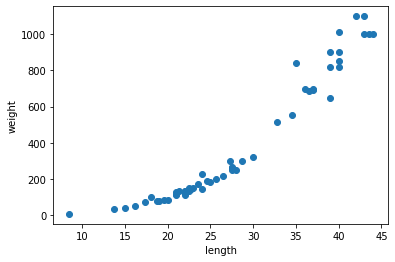

In [ ]:
# 농어의 길이, 무게로 산점도 그리기

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련, 테스트 세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 1차원 배열 => 2차원 배열
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 회귀 모델 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)
# score 함수 - 분류일 경우 정확도, 회귀일 경우 결정계수(R^2) 반환

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction) # 평균 절대값 오차
print(mae) # +- 19.157g 정도의 오차가 있다.

19.157142857142862


## 과대적합과 과소적합

* 과소적합

In [ ]:
# 과소 적합(underfitting) => test 세트 점수가 훈련세트보다 높다 => 훈련세트를 적절히 학습하지 못했다.
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [ ]:
# 과대 적합(overfitting) => .test 세트 점수가 훈련세트보다 낮다

* 이웃 개수 줄이기

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


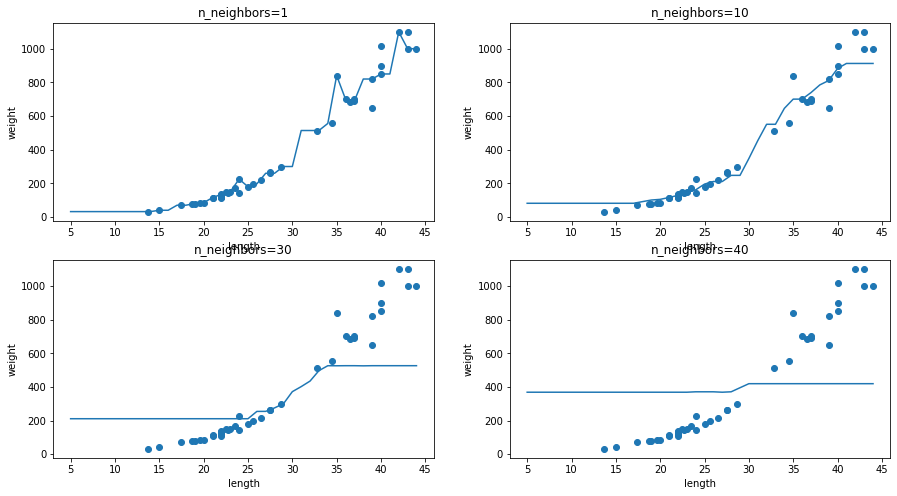

In [ ]:
# 이웃 개수에 따른 과대/과소 적합 정도 확인

# x좌표 범위설정
x= np.arange(5, 45).reshape(-1,1)

# subplot 만들기
fig = plt.figure(figsize=(15,8))
for i in range(4):
    globals()[f'ax{i+1}'] = fig.add_subplot(2, 2, i+1)
# 이웃 개수에 따른 예측값 그래프 그리기
for i, k in enumerate([1, 10, 30, 40]):
  knr = KNeighborsRegressor(n_neighbors=k)
  knr.fit(train_input, train_target)
  pred = knr.predict(x)
  globals()[f'ax{i+1}'].scatter(train_input, train_target)
  globals()[f'ax{i+1}'].plot(x, pred)
  globals()[f'ax{i+1}'].set_title(f'n_neighbors={k}')
  globals()[f'ax{i+1}'].set_xlabel('length')
  globals()[f'ax{i+1}'].set_ylabel('weight')
plt.show()